# Laboratorio 1: Campo eléctrico en 2D
## Parte 1: Visualización del campo electrico.

Cuando calculamos el campo eléctrico generado por una distribución de cargas, lo que hacemos es descomponer este objeto en un conjunto de cargas mas pequeñas para luego sumar el campo electrico aportado por cada una de ellas. Es decir tomaremos el diferencial de el campo electrico genderado por un diferencial de carga $dq$ una distancia r. 

$$d\vec{E} = \dfrac{1}{4\pi\epsilon_0}\frac{dq}{r^2}\hat{r}$$

donde $\hat{r}$ es la dirección y $r$ es la distancia de el elemento de carga al punto que deseo medir el campo electrico. 

luego sumamos la contribución de cada uno de ellos al integrar sobre la distribución. 

$$\vec{E}=\dfrac{1}{4\pi\epsilon_0}\int\frac{dq}{r^2}\hat{r}$$

En este laboratorio utilizaremos este principio para calcular el campo electrico de una distribución en  dos dimensiones. 

En este caso nuestro espacio en dos dimensiones estará representado por una raiz $N \times M$. que contendrá el valor de la carga punto. Para simplifar nuestro modelo consideraremos valores de carga discretos en valores de -1, 0 y 1. Es decir nuestra matriz representará la distribución de cargas. La matriz sería de la siguiente forma.

\begin{equation*}
A = 
\begin{pmatrix}
-1 & 0 & 1 \\
0 & 1 & 0  \\
1 & 0 & -1  \\
\end{pmatrix}
\end{equation*}

Obviamente ese es un ejemplo en una matriz muy pequeña, pero podemos imaginar como se vería una districuión de cargas. Con eso en mente nuestro objetivo es crear una matriz que represente una distribrución de carga y luego calcular el campo electrico en cada punto de el espacio sumando la contribución de cada carga. 


Para trabajar en nuestra idea lo primero que debemos hacer es importar librerias que nos permitan trabajar con matrices.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Debemos crear una matriz que represente el espacio, graficaremos luego sobre el.

En esta linea voy indicar que python ignore en el caso de encontrarse con valores dividios por cero o invalido, esto es peligroso en ciertos casos, pero queremos trabajar con el codigo y luego podríamos ver ese tipo de errores

In [2]:
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

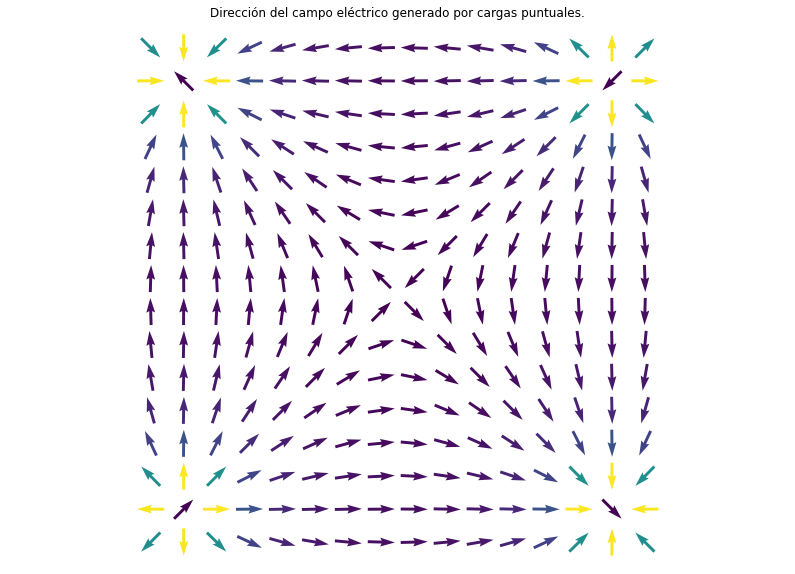

In [29]:
#El siguiente código es para visualizar la dirección de el campo electrico formado por partículas puntuales.

#Tamaño de la matriz MxN
#Estos valores deben ser modificados si se cambia el tamaño de la matriz
N = 16
M = 16

# Creo un vector de largo M y otro N y luego creo una matriz
X = np.arange(0, M, 1)
Y = np.arange(0, N, 1)
X, Y = np.meshgrid(X, Y)
# Creo una matriz de ceros para el campo electrico, en la coordenada horizontal x y vertical y
Ex = np.zeros((N, M))
Ey = np.zeros((N, M))

#Para lo primeros ejemplos consideremos una matriz de MxN
#Podemos crear una matriz a mano de 8x8, para su trabajo deberán crear una matriz de 16x16
Dist = [[0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 1, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,-1,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0],
        [0, -1, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,1,0],
        [0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0]]
#El principio es recorrer la matriz y cuando encontramos un valor con carga distinto a cero,
#Recorreremos nuevamente para calcular el campo electrico generado por la carga puntual y luego ir sumando en cada celda
#Recorremos la matriz a lo largo y a lo ancho
for i in range(N):
        for j in range(M):
            if Dist[i][j] !=0: #si encuentra un valor distinto a cero recorre nuevamente la matriz. 
                for k in range(N):
                    for l in range(M):
                        r = (((k - i)) ** 2 + ((l - j)) ** 2) ** 0.5 # En cada punto calculamos la distancia
                        if r != 0: #si la distancia es distinta a cero sumamos el campo electrico en la coordenada.
                            Ex[k, l] += Dist[i][j] *(l-j)/ r**3
                            Ey[k, l] += Dist[i][j] *(k-i)/ r**3
                            
#Con las componentes del campo electrico calculamos la magnitud del vector y lo guardamos como C
C = (Ex ** 2 + Ey ** 2) ** 0.5
#Para sólo graficar la dirección de el campo normalizo el vector por la magnitud
Ex = Ex/C
Ey = Ey/C

#Para graficar crearemos un figura
plt.figure(figsize=(14, 10))

#Sobre la figura graficaremos flechas para mostrar la dirección del campo.
#plt.quiver(PosX,PosY, Valor_x,Valor_y,Color,Que la flecha pivote desde el centro 'mid')
#Hay que tener ojo que al graficar la imagen se verá invertida.
plt.quiver(X, Y, Ex, Ey, C, pivot='mid')

#Creamos un título
plt.title('Dirección del campo eléctrico generado por cargas puntuales.')
plt.axis('equal')
plt.axis('off')
plt.show()



## Parte dos: Lineas de Campo electrico.

En la primera parte calculamos la dirección del campo eléctrico, si bien el código es simple, pero es poco practico. Ahora buscaremos una forma que nos permita visualizar las lineas de campo Eléctrico, aplicaremos esto para un dipolo y usted deberá contestar el cuestionario e incluir las imágenes como sus resultados, pueden bajar la imagen obtenida haciendo click derecho sobre la imagen y luego guardar imagen como.

Calcularemos el campo eléctrico como 

$$dEx = \dfrac{q}{(x-x_0)^3}\cdot(x-x_0)$$

$$dEy = \dfrac{q}{(y-y_0)^3}\cdot(y-y_0)$$

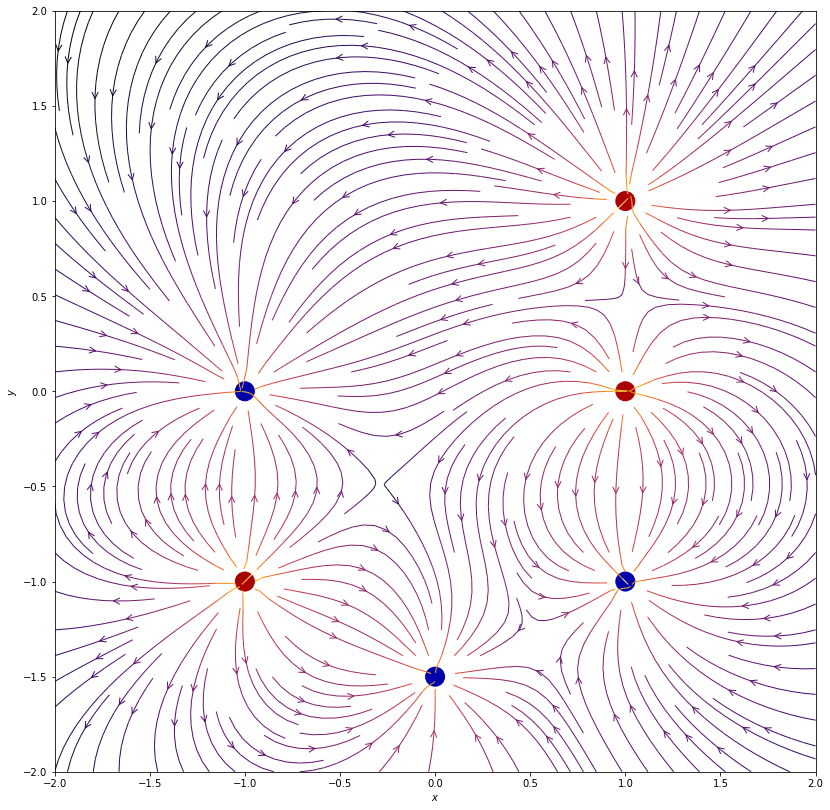

In [48]:
#primero importamos las librerías que nos van a permitir realizar los cálculos
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

#Esta función devuelve el campo electrico generado por una carga q en una posición r0.
# Los parámetros de entrada son la carga, la posición de la carga r0 y va a calcular el campo electrico sobre el espacio x,y. 
# De esta manera no tenemos que recorrer la matriz y el calculo será mas rápido.
def E(q, r0, x, y):
    den = np.hypot(x-r0[0], y-r0[1])**3 #Calculamos el denominador de la función, es decir la distancia.
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den #la función retorna las componentes del campo electrico, Ex y Ey


#creamos una grilla que va de -2 a 2. 64 puntos por linea.
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

nq = 3 #Numero de Cargas, si se agregan mas se debe modificar este valor
charges = [] #Creamos una variable en donde estarán las cargas
#Agregaremos las cargas a la variable anterior charges.append((Valor_carga,(Posicion_x,Posicion_y))) 
charges.append((1,(1,1))) #Carga, pos_x, pos_y
charges.append((1,(1,0))) 
charges.append((1,(-1,-1))) 
charges.append((-1,(-1,0)))
charges.append((-1,(0,-1.5))) 
charges.append((-1,(  1,-1)))

# Tomaremos el campo electrico como los componentes en el eje-x y en el eje-y
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
# Ahora para cada carga calcularemos el campo electrico que se genera en el espacio X,Y con la función del inicio 
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey
#Ahora graficamos, creamos una imagen
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111)

# vamos a crear una paleta de colores, basandonos en la magnitud del campo E
color = 2 * np.log(np.hypot(Ex, Ey))
# la siguiente función creará la lineas de campo electrico, no es necesario modificar esta parte
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Para que se vea mejor, en las posiciones donde están las cargas vamos a dibujar unos circulos rojos para las cargas positivas
# y azules para las cargas negativas.
charge_colors = {True: '#aa0000', False: '#0000aa'} #ahí se definen los colores, los pueden cambiar si desean. 

#acá para cada carga dibujaremos un circulo, en posición de la carga de tamaño 0.05 y el color según la función anterior.
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

#Terminamos la imagen escribiendo la leyenda en los ejes y seleccionamos que el aspecto del eje x sea igual al eje y, así 
#no se distorciona la imagen
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()